In [1]:
import sys
sys.path.insert(1, "games/")
sys.path.insert(1, "networks/")
from tic_tac_toe import TicTacToe
from tic_tac_toe_net import create_network

from model import Model

import numpy as np
np.random.seed(42)

import platform
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

In [2]:
game = TicTacToe()
model = Model(create_network(game.shape, game.nb_actions), summary=True)
model.load("networks/network_tic_tac_toe.h5")

2021-12-03 01:20:45.092275: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 01:20:45.281201: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 01:20:45.281623: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 01:20:45.286259: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "TicTacToe_network"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 3, 2)]    0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 3, 3, 128)    384         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 3, 3, 128)   512         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 re_lu (ReLU)                   (None, 3, 3, 128)    0           ['batch_normaliza

In [3]:
state = game.get_init_state()
model.predict(state)

2021-12-03 01:20:50.019266: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


(array([0.10793151, 0.10191493, 0.09933091, 0.10555427, 0.16365416,
        0.09662193, 0.1229848 , 0.10691744, 0.09509006], dtype=float32),
 0.0348368)

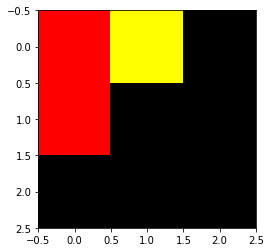

Model prediction: (array([0.10800273, 0.10971719, 0.09462236, 0.10296442, 0.17789866,
       0.09502013, 0.12403866, 0.10456041, 0.08317541], dtype=float32), 0.03885618)
Root value: 0.11786755187786184


ValueError: invalid literal for int() with base 10: ''

In [11]:
state = game.get_init_state()
game.play_vs(model, state, 100)